# Data Exploration

In this notebook, we will try and understand how to quickly get a glimpse of what a dataset contains before jumping into predictive modeling

In [1]:
import pandas as pd
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors

#### Step 1: Always check the size of the dataset and what its columns and initial rows look like:

In [2]:
df = pd.read_csv("data/ADME_public_set_3521.csv")
print(f"The dataset contains {df.shape[0]} endpoints")
df.head(3)

The dataset contains 3521 endpoints


,Internal ID,Vendor ID,SMILES,CollectionName,LOG HLM_CLint (mL/min/kg),LOG MDR1-MDCK ER (B-A/A-B),LOG SOLUBILITY PH 6.8 (ug/mL),LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound),LOG PLASMA PROTEIN BINDING (RAT) (% unbound),LOG RLM_CLint (mL/min/kg)
0,Mol1,317714313,CNc1cc(Nc2cccn(-c3ccccn3)c2=O)nn2c(C(=O)N[C@@H...,emolecules,0.675687,1.493167,0.089905,0.991226,0.518514,1.392169
1,Mol2,324056965,CCOc1cc2nn(CCC(C)(C)O)cc2cc1NC(=O)c1cccc(C(F)F)n1,emolecules,0.675687,1.040780,0.550228,0.099681,0.268344,1.027920
2,Mol3,304005766,CN(c1ncc(F)cn1)[C@H]1CCCNC1,emolecules,0.675687,-0.358806,NaN,2.000000,2.000000,1.027920


#### Step 2: Check the overall content of the df using info() and describe()

In [3]:
# Get non-null count and data types in columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3521 entries, 0 to 3520
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Internal ID                                     3521 non-null   object 
 1   Vendor ID                                       3521 non-null   object 
 2   SMILES                                          3521 non-null   object 
 3   CollectionName                                  3521 non-null   object 
 4   LOG HLM_CLint (mL/min/kg)                       3087 non-null   float64
 5   LOG MDR1-MDCK ER (B-A/A-B)                      2642 non-null   float64
 6   LOG SOLUBILITY PH 6.8 (ug/mL)                   2173 non-null   float64
 7   LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound)  194 non-null    float64
 8   LOG PLASMA PROTEIN BINDING (RAT) (% unbound)    168 non-null    float64
 9   LOG RLM_CLint (mL/min/kg)                

In [4]:
#Generate stats on the columns:
df.describe()

,LOG HLM_CLint (mL/min/kg),LOG MDR1-MDCK ER (B-A/A-B),LOG SOLUBILITY PH 6.8 (ug/mL),LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound),LOG PLASMA PROTEIN BINDING (RAT) (% unbound),LOG RLM_CLint (mL/min/kg)
count,3087.000000,2642.000000,2173.000000,194.000000,168.000000,3054.000000
mean,1.320019,0.397829,1.259943,0.765722,0.764177,2.256207
std,0.623952,0.688465,0.683416,0.847902,0.798988,0.750422
min,0.675687,-1.162425,-1.000000,-1.593460,-1.638272,1.027920
25%,0.675687,-0.162356,1.153510,0.168067,0.226564,1.688291
50%,1.205313,0.153291,1.542825,0.867555,0.776427,2.311068
75%,1.803115,0.905013,1.687351,1.501953,1.375962,2.835274
max,3.372714,2.725057,2.179264,2.000000,2.000000,3.969622


#### Check the distribution of values/properties

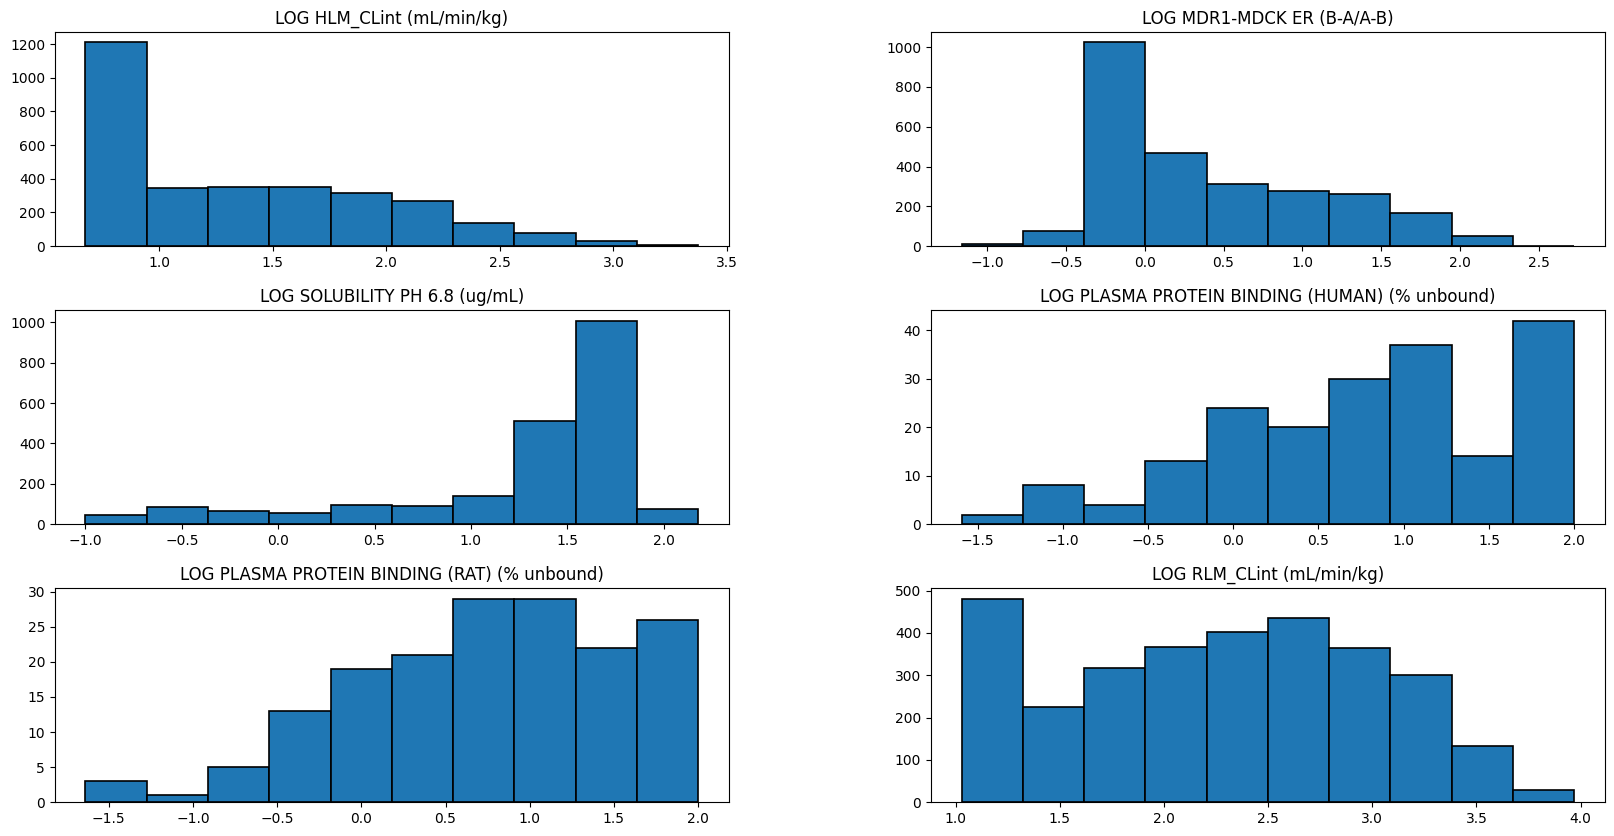

In [5]:
# Quickly check distributions for all properties in the entire histogram:

df.hist(figsize=(20,10), grid=False, edgecolor='black', linewidth=1.2);

<Axes: xlabel='LOG SOLUBILITY PH 6.8 (ug/mL)', ylabel='Count'>

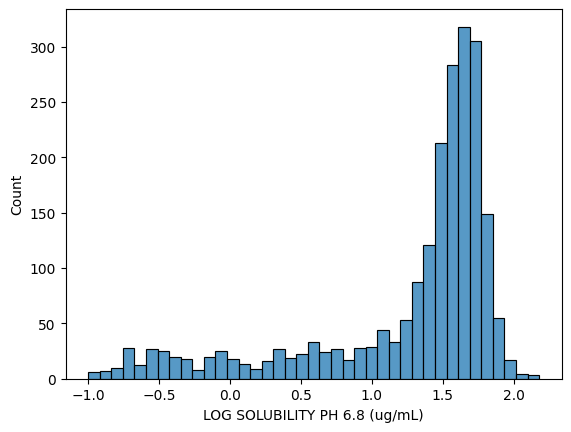

In [6]:
#Checking the histogram with xticks properly aligned on the X-axis:

sns.histplot(df['LOG SOLUBILITY PH 6.8 (ug/mL)'])

#### Step 4: Visualise the molecules:

In [7]:
df['mol'] = df['SMILES'].apply(Chem.MolFromSmiles)